# 毫米波电线检测

---

# 目录

- [数据](#数据)
- [$k$-折交叉验证](#$k$-%E6%8A%98%E4%BA%A4%E5%8F%89%E9%AA%8C%E8%AF%81)

## 数据

1. 进入代码目录

In [4]:
cd /home/alvin/opt/git/powerline/model_fusion

/opt/git/powerline/model_fusion


In [5]:
ls

accuracy.pth  dataset/        main_predict.py  models/          result/
checkpoints/  fusion/         main_train.py    powerline.ipynb  train/
data/         main_fusion.py  model/           predict/         utils/


In [22]:
import matplotlib.pyplot as plt

from torchvision import transforms
from dataset.utils import *
from dataset.powerline_Dataset import get_all_images_list, powerline_Dataset,split_train_val_dataset_list

%matplotlib inline

In [18]:
train_list, val_list = split_train_val_dataset_list("data", ratio=0.3)

In [19]:
train_dataset= powerline_Dataset(train_list, transform=transforms.Compose([
        ReSize((512, 512)),
        BgrToRgb(),
        AnnotationBinarization(),
        # ToTensor(), 
        # Normalize_to_one(),
        # Normalize(mean=[0.485, 0.456, 0.406], 
        #     std=[0.229, 0.224, 0.225]),
        ]))

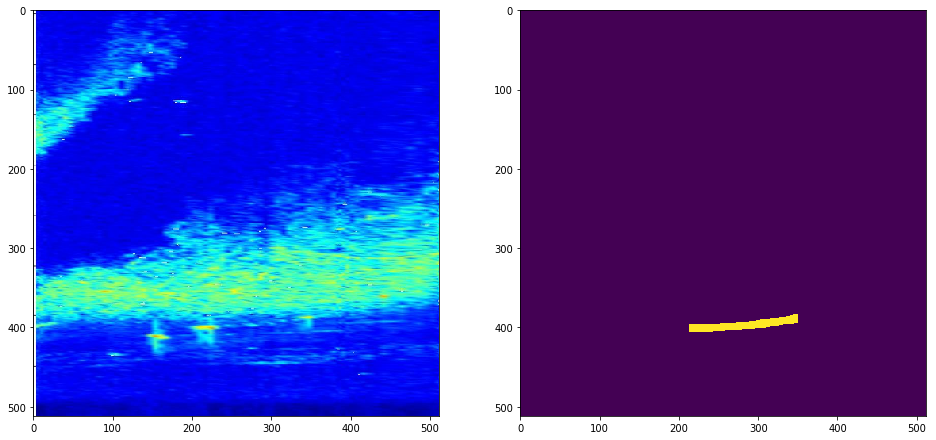

In [47]:
# train data display
idx = 45

sample=train_dataset[idx]

im,label = sample


figsize=[16,8]
fig = plt.figure(figsize=figsize)

axes = fig.subplots(1,2)

axes[0].imshow(im)
axes[1].imshow(label)

fig.show()


# $k$-折交叉验证

**交叉验证：**先将数据集$D$划分为$k$个大小相似的互斥子集，即$D=D_1\cup D_2\cdots D_k, D_i\cap D_j=\phi(i\neq j).$每一个子集都尽量保持数据分布的一致性，即从$D$中通过分层采样得到。然后每次用$k-1$个自己的并集作为训练集，余下的那个子集作为测试集；这样就可以获得$k$组**_训练/测试集_**，从而可进行$k$次训练和测试，最终返回的是这$k$个测试结果的均值。

示意图：
![$k$-折交叉验证](https://gss3.bdstatic.com/7Po3dSag_xI4khGkpoWK1HF6hhy/baike/c0%3Dbaike80%2C5%2C5%2C80%2C26/sign=23cdb2af33292df583cea447dd583705/8326cffc1e178a820e220820ff03738da977e810.jpg)